# Toxrefdb - Toxicity Reference Database
Example notebook shows how to generate the [toxrefdb blog post](https://insilica.co/posts/2023-11-11-toxrefdb/)

In [8]:
import sqlite3, pandas as pd
import biobricks as bb

# Access the ToxRefDB asset
bb.install('toxrefdb')
assets = bb.assets("toxrefdb")
conn = sqlite3.connect(assets.toxrefdb_sqlite)

# Query to get NOAEL data
query = """
SELECT c.preferred_name AS chemical_name,
       g.name AS guideline_name,
       p.dose_level < p.max_dose_level AS adverse
FROM pod p
JOIN chemical c ON p.chemical_id = c.chemical_id
JOIN study s ON p.study_id = s.study_id
JOIN guideline g ON s.guideline_id = g.guideline_id
WHERE p.pod_type = 'noael'
"""
data = pd.read_sql_query(query, conn)

# Count hazardous and non-hazardous compounds for each guideline
summary = data.groupby(['guideline_name', 'adverse']).size().unstack(fill_value=0)
summary


2024-07-04 14:29:47 | INFO: running checks on brick
2024-07-04 14:29:47 | INFO: git clone https://github.com/biobricks-ai/toxrefdb biobricks-ai/toxrefdb/270b4ebcf43e6de0867dadd11950f612d50b2ba3 in /mnt/biobricks
Overall Progress: 100%|██████████| 426M/426M [00:08<00:00, 51.0MiB/s]    
2024-07-04 14:29:55 | INFO: https://github.com/biobricks-ai/toxrefdb#270b4ebcf43e6de0867dadd11950f612d50b2ba3 succesfully downloaded to BioBricks library.



1 files downloaded successfully!


adverse,0,1
guideline_name,,
13-Week Toxicity in Rodents,1312,977
14-day Toxicity in Rodents,197,164
2 - Year Toxicity,1623,1130
28-day Oral Toxicity in Rodents,68,118
90-Day Inhalation Toxicity,38,58
90-day Dermal Toxicity,80,143
90-day Oral Toxicity in Nonrodents,1004,1075
90-day Oral Toxicity in Rodents,3460,2433
Carcinogenicty,1550,1218


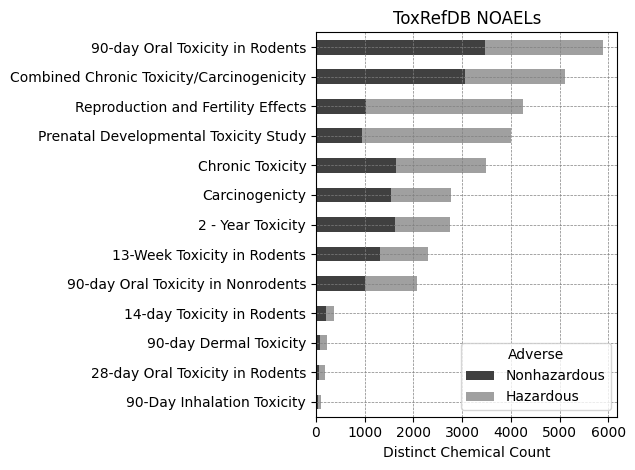

In [9]:
import matplotlib.pyplot as plt

# Calculate the total count for each guideline
summary['total'] = summary.sum(axis=1)

# Sort the summary by total count in descending order
summary = summary.sort_values(by='total', ascending=True)

# Drop the 'total' column as it's no longer needed for plotting
summary = summary.drop(columns='total')

# Plot the data
summary.plot(kind='barh', stacked=True, color=['#404040', '#a0a0a0'])
plt.xlabel('Distinct Chemical Count')
plt.ylabel('')
plt.title('ToxRefDB NOAELs')
plt.legend(['Nonhazardous', 'Hazardous'], loc='lower right', title='Adverse')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()
